<a href="https://colab.research.google.com/github/jadhavgaurav/cement-composite-strength-prediction/blob/main/cement_composite_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Data Manipulation library
import pandas as pd
import numpy as np

#Import Data visualizatio library
import matplotlib.pyplot as plt
import seaborn as sns

#Import filter warning library
import warnings
warnings.filterwarnings('ignore')

#Import scikit Learn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

# import Deep Learning Library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
from tensorflow.keras.utils import plot_model


In [2]:
# Import Dataset Using Pandas Function

url = 'https://raw.githubusercontent.com/jadhavgaurav/cement-composite-strength-prediction/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)
df.sample(frac = 1) # Shuffle Dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
715,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90,39.66
630,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,28,17.34
517,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7,15.07
208,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,100,39.61
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,13.12
...,...,...,...,...,...,...,...,...,...
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14,33.01
832,147.0,115.0,89.0,202.0,9.0,860.0,829.0,28,19.99
671,236.0,157.0,0.0,192.0,0.0,972.6,749.1,7,20.42
1012,325.6,166.4,0.0,174.0,8.9,881.6,790.0,28,61.24


In [3]:
# Checking Data information and Missing Values if any...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# Checking Descriptive Stattistics
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Based on above information, we find that the dataset is non normal distributed

In [5]:
# Univariate Analysis

from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum' : df[i].max(),
        'Minimum' : df[i].min(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        '25%': df[i].quantile(0.25),
        '75%': df[i].quantile(0.75),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)

report = pd.DataFrame(stats)
report

,Feature,Maximum,Minimum,Mean,Median,25%,75%,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,540.0,102.00,281.167864,272.900,192.375,350.000,104.506364,10921.580220,0.509481,-0.520652,157.625
1,blast_furnace_slag,359.4,0.00,73.895825,22.000,0.000,142.950,86.279342,7444.124812,0.800717,-0.508175,142.950
2,fly_ash,200.1,0.00,54.188350,0.000,0.000,118.300,63.997004,4095.616541,0.537354,-1.328746,118.300
3,water,247.0,121.80,181.567282,185.000,164.900,192.000,21.354219,456.002651,0.074628,0.122082,27.100
4,superplasticizer,32.2,0.00,6.204660,6.400,0.000,10.200,5.973841,35.686781,0.907203,1.411269,10.200
5,coarse_aggregate,1145.0,801.00,972.918932,968.000,932.000,1029.400,77.753954,6045.677357,-0.040220,-0.599016,97.400
6,fine_aggregate,992.6,594.00,773.580485,779.500,730.950,824.000,80.175980,6428.187792,-0.253010,-0.102177,93.050
7,age,365.0,1.00,45.662136,28.000,7.000,56.000,63.169912,3990.437729,3.269177,12.168989,49.000
8,concrete_compressive_strength,82.6,2.33,35.817961,34.445,23.710,46.135,16.705742,279.081814,0.416977,-0.313725,22.425


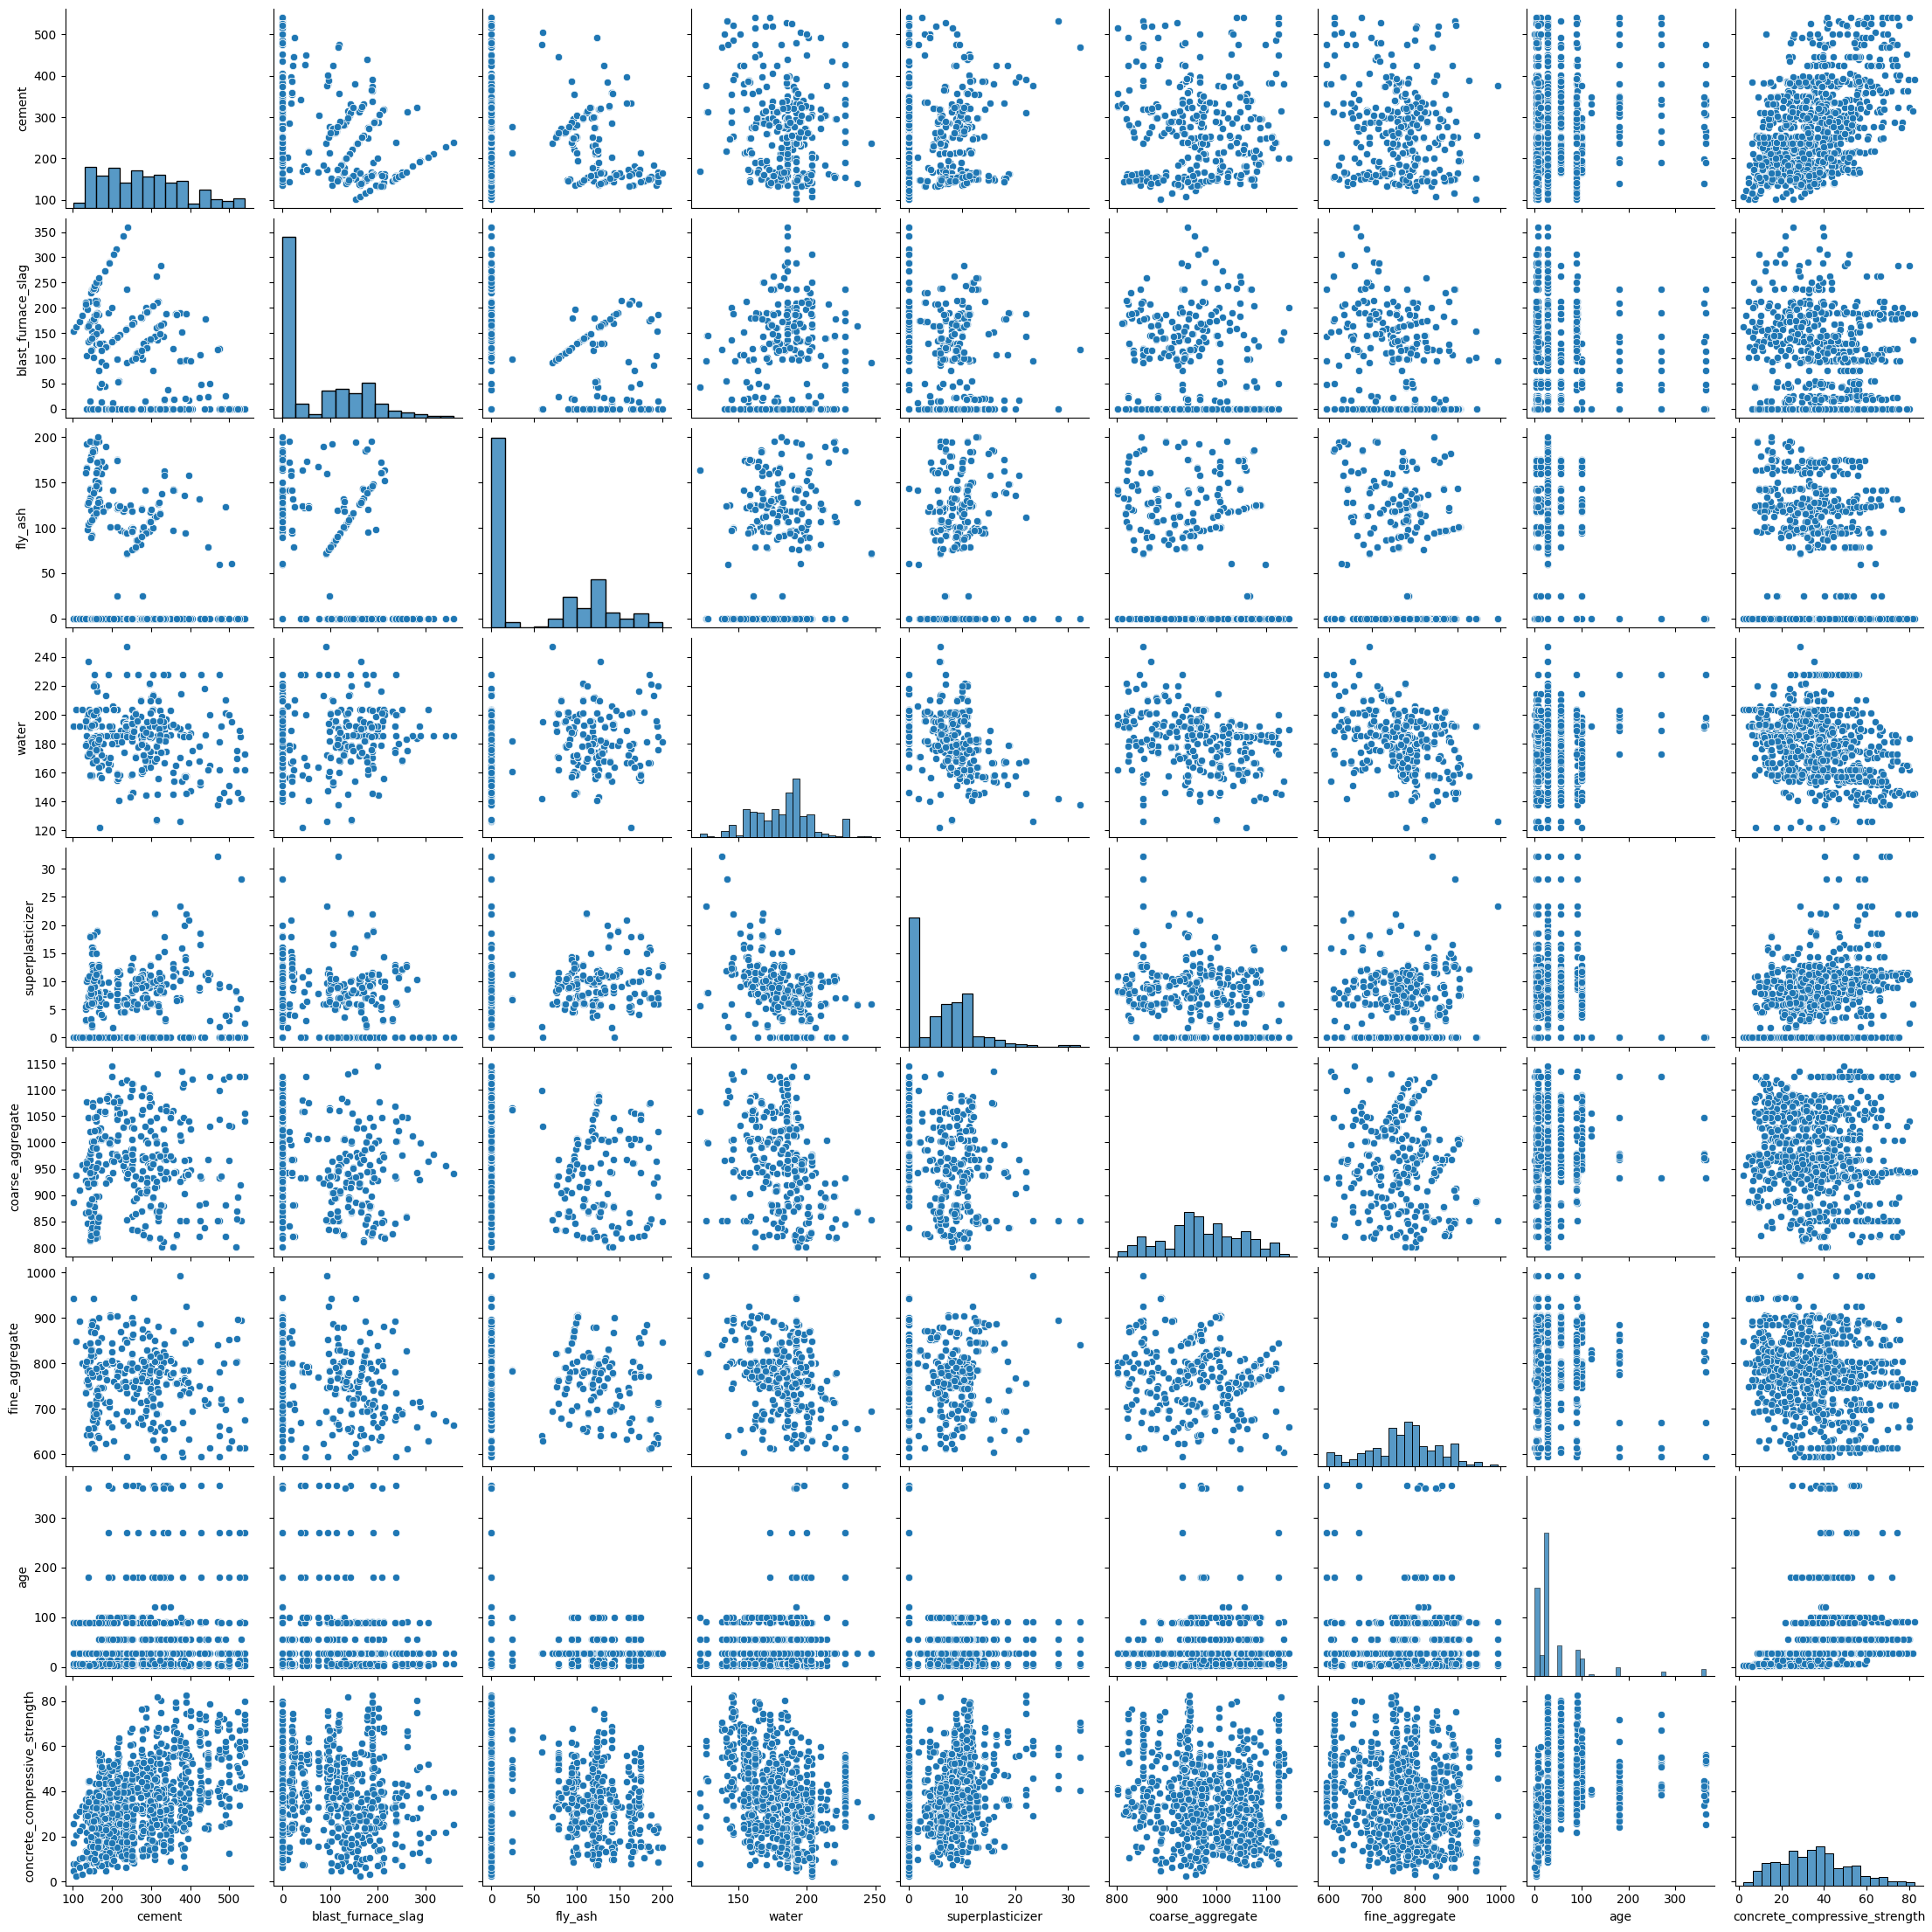

In [6]:
sns.pairplot(df)

In [7]:
# Feature Engineering

df['Comps'] = (df['cement'] + df['blast_furnace_slag'] + df['superplasticizer']) / df['water']

In [8]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Comps                            0.620196
Name: concrete_compressive_strength, dtype: float64

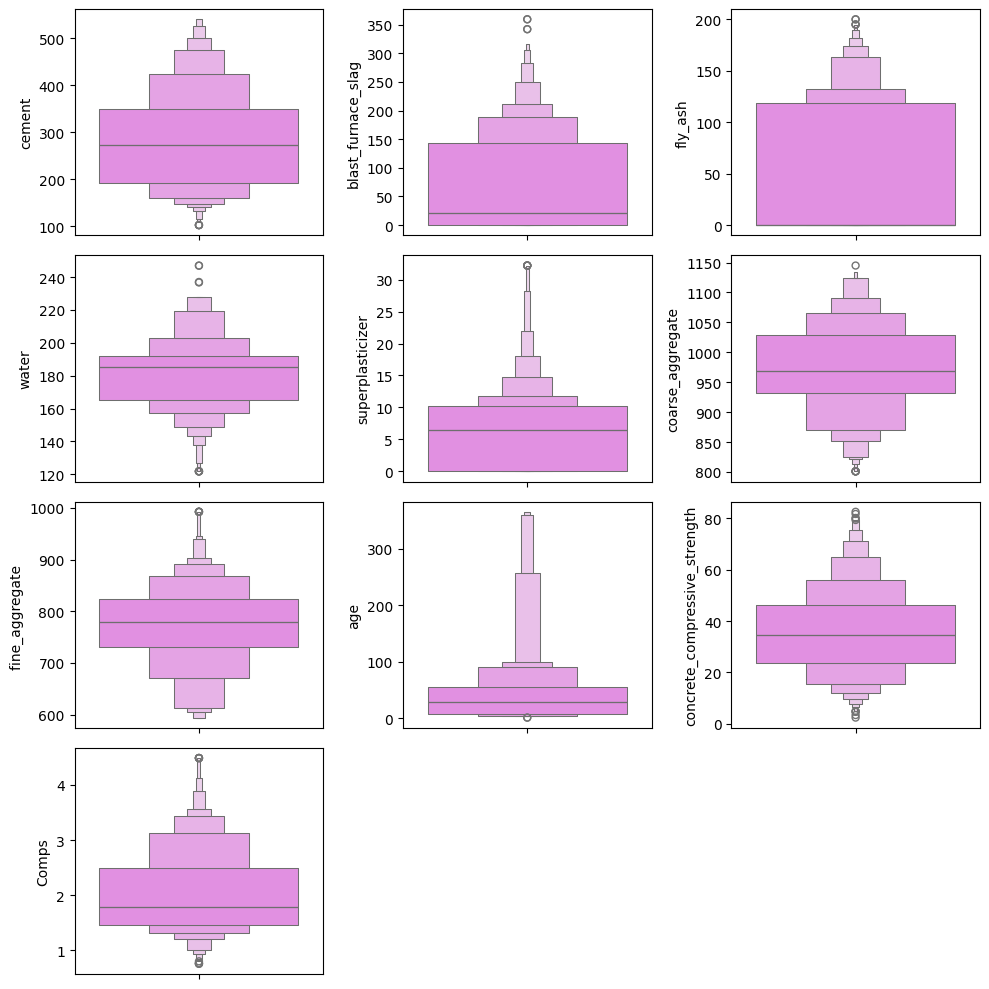

In [9]:
# Boxplot for detecting outliers in the dataset
plt.figure(figsize=(10, 10))
plot = 0
for i in df.columns:
    plot += 1
    plt.subplot(4, 3, plot)
    sns.boxenplot(df[i], color='violet')
    plt.tight_layout()
plt.show()


In [10]:

# Checking Column Names
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength', 'Comps'],
      dtype='object')

In [11]:
# Split Data into X and y
X = df.drop(columns = ['concrete_compressive_strength']) # Independent Columns
y = df['concrete_compressive_strength'] # target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

fit_tranform is only applied to train and transform is applied to test set to avoid data leakage.

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.max(), X_train.min()

(np.float64(1.0000000000000002), np.float64(0.0))

In [ ]:
# import RandomForest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = r2_score(y_test, y_pred)

print(f'The R2 score is: {round(score, 2)}')

The Accuracy is: 0.89


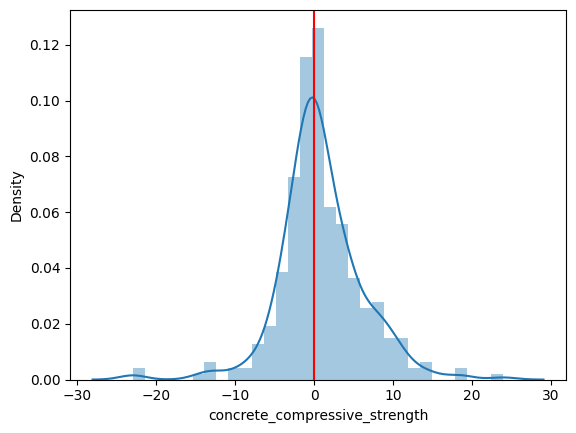

In [15]:

sns.distplot(y_test - y_pred)
plt.axvline(0,color = 'red')
plt.show()

In [1]:
import pickle

with open('model.pkl', "wb") as file:
    pickle.dump(model, 'model.pkl' )

NameError: name 'model' is not defined

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 9 ))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'r2_score'])
model.fit(X_train, y_train, epochs=1000, batch_size=16)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1625.4409 - mae: 36.8708 - r2_score: -5.2743
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 661.8551 - mae: 20.8599 - r2_score: -1.4014
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189.3256 - mae: 11.2221 - r2_score: 0.3293
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161.7803 - mae: 10.3237 - r2_score: 0.3922
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147.9252 - mae: 9.8361 - r2_score: 0.4833
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.0172 - mae: 9.3086 - r2_score: 0.5014
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.2570 - mae: 8.4277 - r2_score: 0.6093
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.7503 - mae: 8.1580 - r2_score: 0.6061
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.8722 - mae: 8.4645 - r2_score: 0.6110
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.8361 - mae

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

<Axes: >

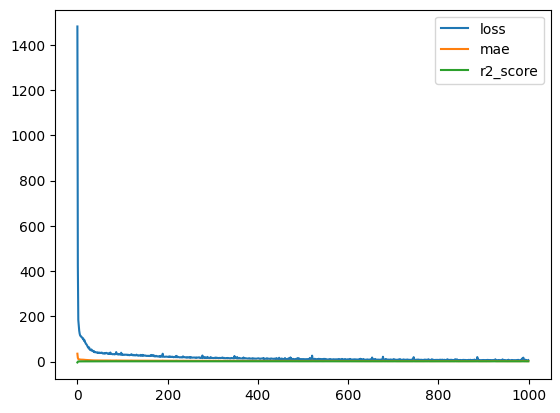

In [30]:
hist = model.history.history
hist = pd.DataFrame(hist)
hist.plot()

In [31]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [32]:
score = r2_score(y_test, y_pred)

print(f'The Accuracy is: {round(score, 2)}')

The Accuracy is: 0.89


In [33]:
# ANN Model Building

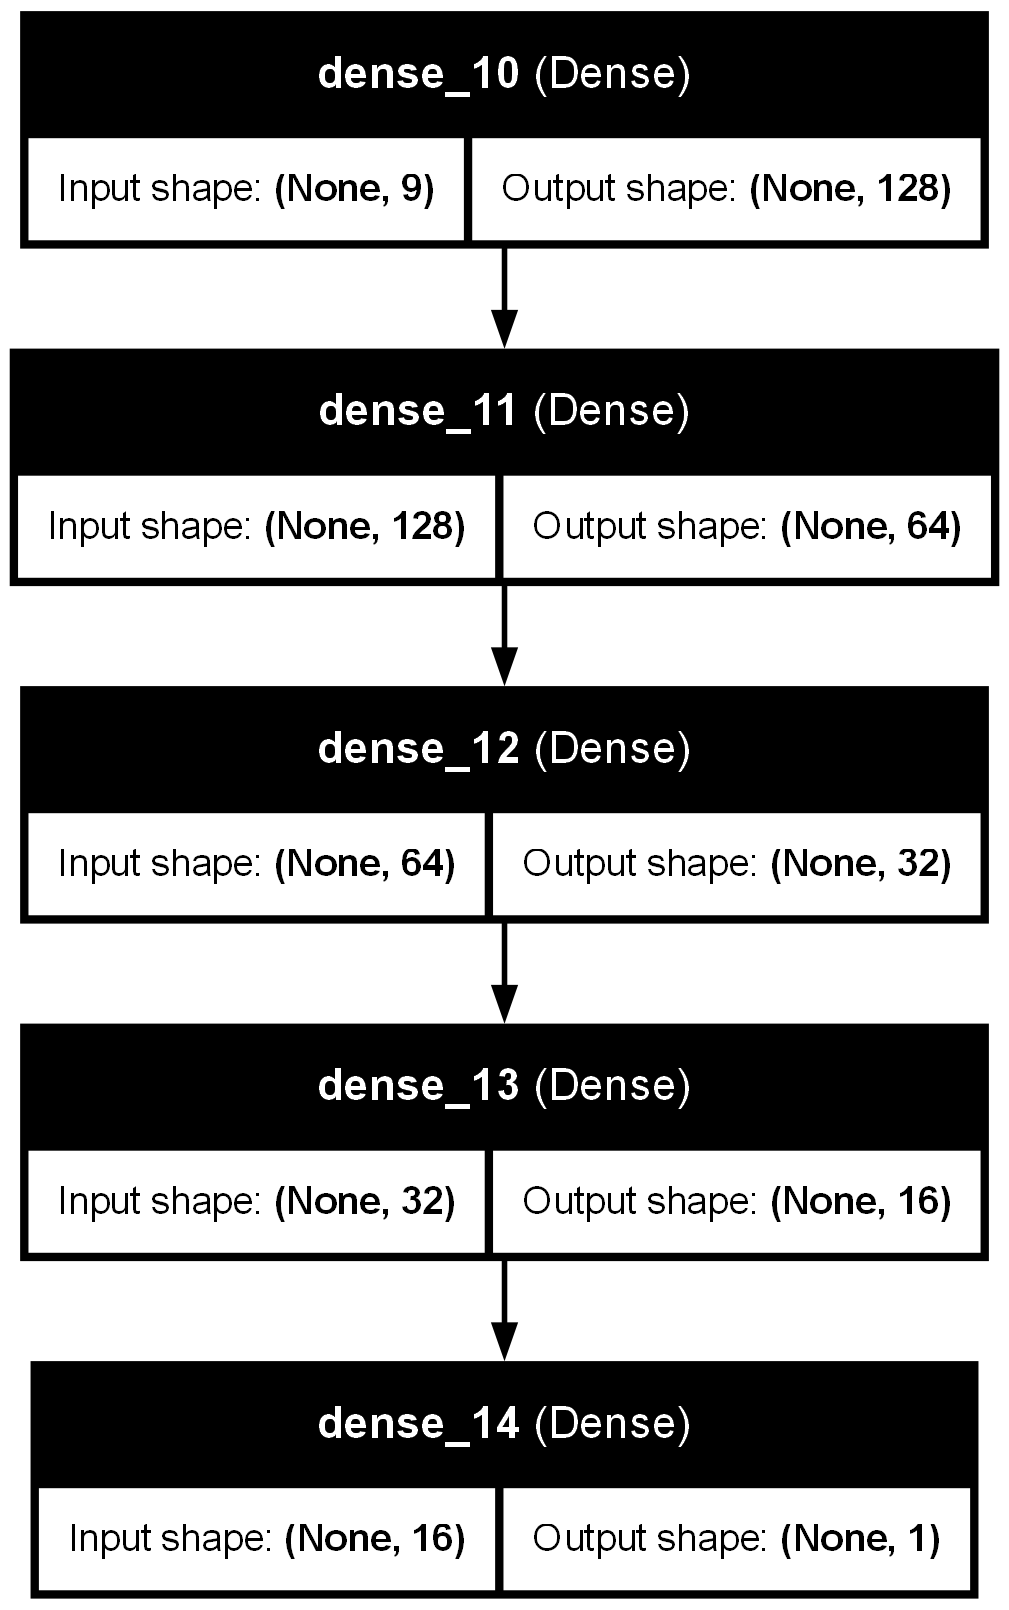

In [34]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

plot_model(model, to_file="model_ann.png", show_shapes=True, show_layer_names=True)

In [35]:
# Predictions using the best model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [36]:
# Calculate R² scores
train_score = r2_score(y_train, y_train_pred) * 100
test_score = r2_score(y_test, y_test_pred) * 100

print("R² Score on Training Set: %.2f" % train_score)
print("R² Score on Test Set: %.2f" % test_score)


R² Score on Training Set: 97.52
R² Score on Test Set: 89.15


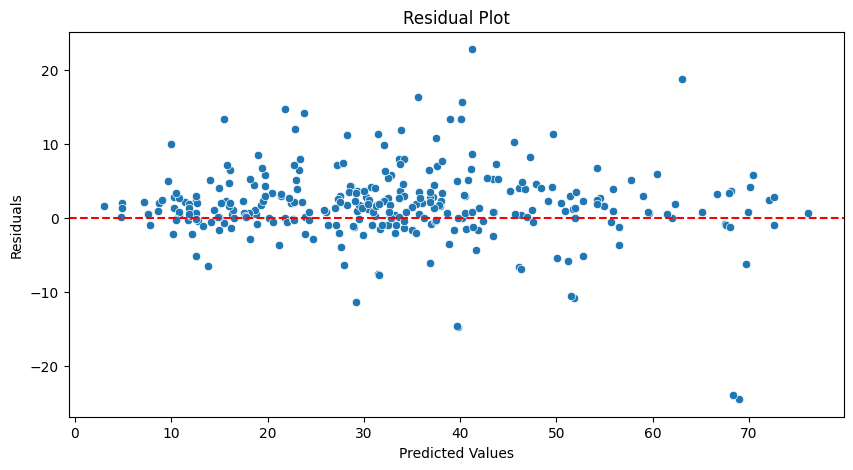

In [37]:
# Compute residuals
residuals = y_test - y_test_pred.flatten()

# Plot Residuals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_pred.flatten(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

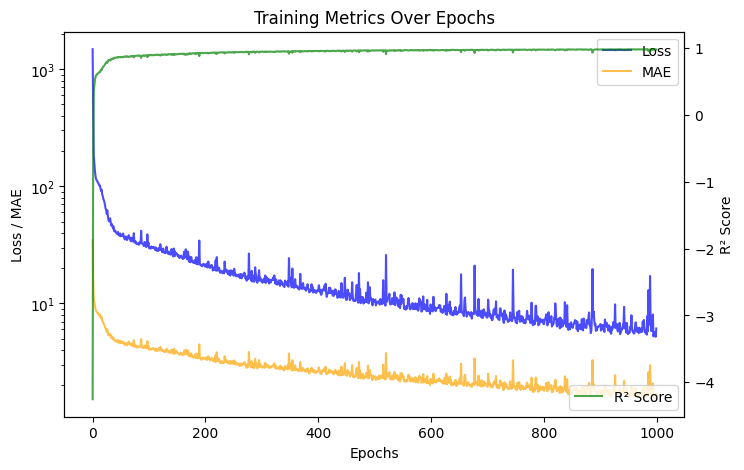

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' is the training history dictionary
history_df = pd.DataFrame(hist)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot loss and MAE on primary y-axis
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss / MAE")
ax1.plot(history_df.index, history_df["loss"], label="Loss", color="blue", alpha=0.7)
ax1.plot(history_df.index, history_df["mae"], label="MAE", color="orange", alpha=0.7)
ax1.set_yscale("log")  # Log scale for better visualization
ax1.legend(loc="upper right")

# Create secondary y-axis for R² score
ax2 = ax1.twinx()
ax2.set_ylabel("R² Score")
ax2.plot(history_df.index, history_df["r2_score"], label="R² Score", color="green", alpha=0.7)
ax2.legend(loc="lower right")

plt.title("Training Metrics Over Epochs")
plt.show()
